### Motivation for Autoencoders  ---- Why Autoencoders??

1. Supervised learning is good but in real world the data is not always labeled.. 

2. Can machines do Data compression itself -- compression and decompression functions are learned from the data itself... 

3. If Neural networks can learn features why can't it learn the data representations itself ... 

<img src="images/autoencoder_1.png" width="50%">



#### What are Autoencoders

Autoencoder consits of 

1. An Encoder that compresses the data automatically, without any human intervention.
2. Decoder that constructs the original data back from the representations. 

It uses Neural network for both encoding and decoding purposes.. 

**Theoretically** It's a great Architecture and as novel as solving problem like world hunger problem BUT there are few things to note before we look into the dynamics of the network 

1. **Autoencoders are data-specific**, which means that they will only be able to compress data similar to what they have been trained on.

What does this mean ??
 An autoencoder **trained** on **pictures of faces** would do a rather **poor job** of **compressing pictures of trees**, because the features it would learn would be face-specific
 
2. Autoencoders are **lossy**

What does this mean ??
The decompressed outputs will be degraded compared to the original inputs -- some data will be lost during compression...

3. Autoencoders are learned automatically from data examples, which is a **useful property**

What does this mean ??
It is easy to train **specialized instances** of the algorithm that will perform well on a **specific type of input**. It **doesn't require any new engineering**, **_just appropriate training data_**

### Net- Net

Are they good at data compression?

Usually, not really :((( ....

1. In picture compression for instance, it is pretty difficult to train an autoencoder that does a better job than a basic algorithm like JPEG. 
  
  
The fact that autoencoders are data-specific makes them **generally impractical** for real-world data compression problems: you can only use them on **data that is similar to what they were trained on**, and **making them more general thus requires lots of training data**  



So what's the big deal with autoencoders?

1. Researchers are really putting their efforts on **Unsupervised learning** which is still and unexplored NN frontier and we might have a real use-case in 2-3 years. 

2. Noice reduction -- 

### Let's build the simplest possible autoencoder

In [55]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations : this is hyper parameter change it to find the best
encoding_dim = 32  

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [46]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [47]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [48]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [49]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [56]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s - loss: 0.1030 - val_loss: 0.1012
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.1026 - val_loss: 0.1008
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.1022 - val_loss: 0.1005
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.1019 - val_loss: 0.1002
Epoch 5/50
60000/60000 [==============================] - 6s - loss: 0.1016 - val_loss: 0.0999
Epoch 6/50
60000/60000 [==============================] - 6s - loss: 0.1013 - val_loss: 0.0996
Epoch 7/50
60000/60000 [==============================] - 8s - loss: 0.1010 - val_loss: 0.0993ss: 0
Epoch 8/50
60000/60000 [==============================] - 6s - loss: 0.1007 - val_loss: 0.0991
Epoch 9/50
60000/60000 [==============================] - 6s - loss: 0.1005 - val_loss: 0.0988
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1002 - val_loss: 0

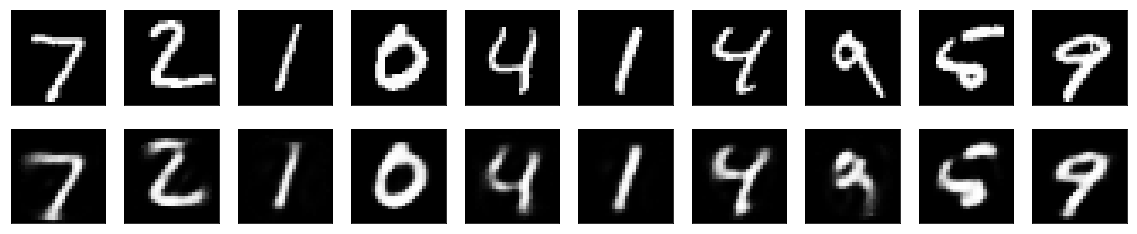

In [54]:
# encode and decode some digits
# note that we take them from the *test* set

#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

decoded_image = autoencoder.predict(x_test)
plot_images(decoded_imgs, x_test)

In [52]:
import matplotlib.pyplot as plt

#def plot_images(decoded_image):
def plot_images(decoded_image, orig_test):
    
    # Plot some of the images
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

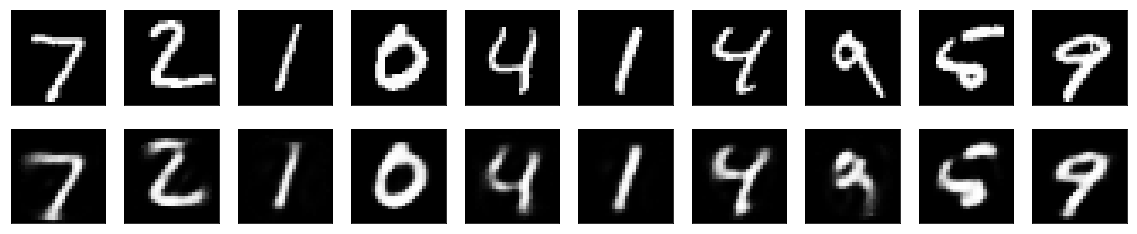

In [53]:
#plot_images(decoded_imgs)
plot_images(decoded_imgs, x_test)

#### Deep Autoencoders
We do not have to limit ourselves to a single layer as encoder or decoder, we could instead use a stack of layers

In [23]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [24]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.3509 - val_loss: 0.2638
Epoch 2/100
60000/60000 [==============================] - 4s - loss: 0.2570 - val_loss: 0.2485
Epoch 3/100
60000/60000 [==============================] - 4s - loss: 0.2392 - val_loss: 0.2285
Epoch 4/100
60000/60000 [==============================] - 4s - loss: 0.2226 - val_loss: 0.2136
Epoch 5/100
60000/60000 [==============================] - 4s - loss: 0.2086 - val_loss: 0.2005
Epoch 6/100
60000/60000 [==============================] - 4s - loss: 0.1960 - val_loss: 0.1897
Epoch 7/100
60000/60000 [==============================] - 4s - loss: 0.1874 - val_loss: 0.1834
Epoch 8/100
60000/60000 [==============================] - 4s - loss: 0.1807 - val_loss: 0.1759
Epoch 9/100
60000/60000 [==============================] - 4s - loss: 0.1751 - val_loss: 0.1724
Epoch 10/100
60000/60000 [==============================] - 4s - loss: 0.1704 - val_lo

60000/60000 [==============================] - 4s - loss: 0.1029 - val_loss: 0.1017
Epoch 86/100
60000/60000 [==============================] - 4s - loss: 0.1027 - val_loss: 0.1019
Epoch 87/100
60000/60000 [==============================] - 4s - loss: 0.1025 - val_loss: 0.1020
Epoch 88/100
60000/60000 [==============================] - 4s - loss: 0.1024 - val_loss: 0.1010
Epoch 89/100
60000/60000 [==============================] - 4s - loss: 0.1022 - val_loss: 0.1015
Epoch 90/100
60000/60000 [==============================] - 4s - loss: 0.1021 - val_loss: 0.1009
Epoch 91/100
60000/60000 [==============================] - 4s - loss: 0.1018 - val_loss: 0.1010
Epoch 92/100
60000/60000 [==============================] - 4s - loss: 0.1017 - val_loss: 0.1000
Epoch 93/100
60000/60000 [==============================] - 4s - loss: 0.1015 - val_loss: 0.1001
Epoch 94/100
60000/60000 [==============================] - 4s - loss: 0.1014 - val_loss: 0.1009
Epoch 95/100
60000/60000 [=================

In [ ]:
decoded_image = autoencoder.predict(x_test)
plot_images(decoded_imgs, x_test)